In [1]:
from itertools import chain
import os
from types import SimpleNamespace

import matplotlib.pyplot as plt
import numpy as np

from run_cifar10 import gen_sweep


In [2]:
hyperparams_to_sweep_precon = SimpleNamespace(
    optimizer=['kradmm', 'krad', 'shampoo'],  
    epochs=['250'],
    eps_str=['1e-6', '1e-4', '1e-2'],
    lr_str=['1', '2.5e-1', '1e-1', '2.5e-2', '1e-2'],
)

hyperparams_to_sweep_gd = SimpleNamespace(
    optimizer=['sgd'],
    epochs=['250'],
    eps_str=['1e-1'],
    lr_str=['1e-1', '5e-2', '2e-2', '1e-2', '5e-3', '2e-3', '1e-3'],
)


hyperparams_to_sweep_ada = SimpleNamespace(
    optimizer=['ada'],
    epochs=['250'],
    eps_str=['1e-1'],
    lr_str=['1e-1', '5e-2', '2e-2', '1e-2', '5e-3', '2e-3', '1e-3'],
)



In [3]:
def fetch_loss_prec(arch, data, hyperparms_list):
    save_dir = '{}_{}_ckpts'.format(arch, data)
    batch_size = 128
    activation='relu'


    loss_s = {}
    prec_s = {}

    opts = ['ada','sgd','krad','kradmm','shampoo']
    for opt in opts:
        args_sweeps_list = [gen_sweep(x.__dict__) for x in hyperparms_list]
        args_sweeps = chain(*args_sweeps_list)

        best = np.inf
        best_name = ''
        for args in args_sweeps:
            if args.optimizer != opt: continue
            opt_modifier_str = (
                '_eps{}_lr{}_batch{}'.format(
                    args.eps_str, args.lr_str, batch_size
                )
            ) + (
                '_soft' if activation=='softplus' else '_relu'
            )
            loss_fn = os.path.join(save_dir, 'loss_{}{}.npy'.format(opt, opt_modifier_str))
            prec_fn = os.path.join(save_dir, 'prec_{}{}.npy'.format(opt, opt_modifier_str))
            loss_, prec_ = [np.load(x) for x in [loss_fn, prec_fn]]
            
            #tr_or_va = 0  # train
            tr_or_va = 1  # val
            if loss_[:, tr_or_va][-1] < best:
                best = loss_[:, tr_or_va][-1]
                best_name = opt_modifier_str
                print(opt+ best_name)
        loss_fn = os.path.join(save_dir, 'loss_{}{}.npy'.format(opt, best_name))
        prec_fn = os.path.join(save_dir, 'prec_{}{}.npy'.format(opt, best_name))
        print([loss_fn, prec_fn])
        try:
            loss_, prec_ = [np.load(x) for x in [loss_fn, prec_fn]]
        except:
            loss_, prec_ = None, None
        loss_s[opt] = loss_
        prec_s[opt] = prec_
    return loss_s, prec_s

flatten = lambda z: [x for y in z for x in y]


In [18]:
arch = 'resnet32'
data = 'CIFAR10'

loss_s, prec_s = fetch_loss_prec(arch, data, [
    hyperparams_to_sweep_precon, hyperparams_to_sweep_gd, hyperparams_to_sweep_ada
])

ada_eps1e-1_lr1e-1_batch128_relu
ada_eps1e-1_lr5e-2_batch128_relu
['resnet32_CIFAR10_ckpts/loss_ada_eps1e-1_lr5e-2_batch128_relu.npy', 'resnet32_CIFAR10_ckpts/prec_ada_eps1e-1_lr5e-2_batch128_relu.npy']
sgd_eps1e-1_lr1e-1_batch128_relu
sgd_eps1e-1_lr5e-2_batch128_relu
['resnet32_CIFAR10_ckpts/loss_sgd_eps1e-1_lr5e-2_batch128_relu.npy', 'resnet32_CIFAR10_ckpts/prec_sgd_eps1e-1_lr5e-2_batch128_relu.npy']
krad_eps1e-6_lr2.5e-1_batch128_relu
krad_eps1e-6_lr1e-1_batch128_relu
krad_eps1e-4_lr2.5e-2_batch128_relu
['resnet32_CIFAR10_ckpts/loss_krad_eps1e-4_lr2.5e-2_batch128_relu.npy', 'resnet32_CIFAR10_ckpts/prec_krad_eps1e-4_lr2.5e-2_batch128_relu.npy']
kradmm_eps1e-6_lr2.5e-1_batch128_relu
kradmm_eps1e-4_lr1e-1_batch128_relu
['resnet32_CIFAR10_ckpts/loss_kradmm_eps1e-4_lr1e-1_batch128_relu.npy', 'resnet32_CIFAR10_ckpts/prec_kradmm_eps1e-4_lr1e-1_batch128_relu.npy']
shampoo_eps1e-6_lr2.5e-1_batch128_relu
shampoo_eps1e-6_lr1e-1_batch128_relu
shampoo_eps1e-6_lr2.5e-2_batch128_relu
shampoo_eps1e

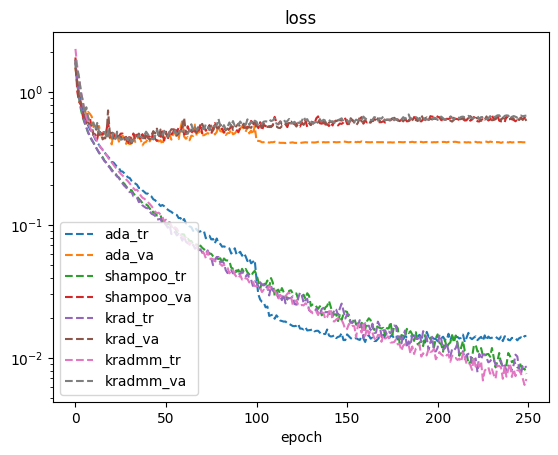

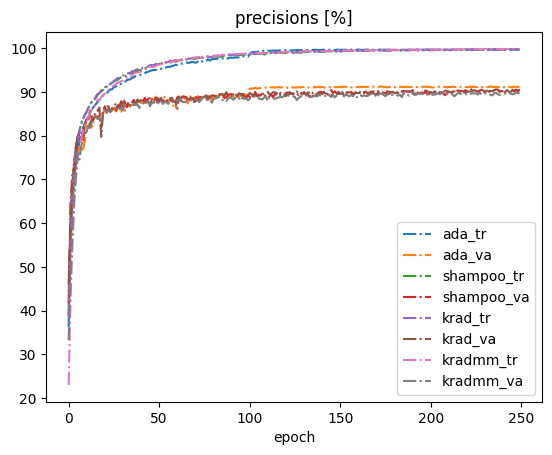

In [19]:
opts_to_plot = ['ada', 'shampoo', 'krad', 'kradmm']

plt.figure()
for opt_name_ in opts_to_plot:
    plt.semilogy(loss_s[opt_name_], '--')
    #plt.plot(loss_s[opt_name_], '--')
plt.legend(flatten([
    ('{}_tr'.format(opt_), '{}_va'.format(opt_)) for opt_ in opts_to_plot
]))
plt.xlabel('epoch')
plt.title('loss')


plt.figure()
for opt_name_ in opts_to_plot:
    plt.plot(prec_s[opt_name_], '-.')
plt.legend(flatten([
    ('{}_tr'.format(opt_), '{}_va'.format(opt_)) for opt_ in opts_to_plot
]))
plt.xlabel('epoch')
plt.title('precisions [%]')

plt.show()

ada_eps1e-1_lr1e-1_batch128_relu
ada_eps1e-1_lr5e-2_batch128_relu
ada_eps1e-1_lr2e-2_batch128_relu
ada_eps1e-1_lr1e-2_batch128_relu
ada_eps1e-1_lr5e-3_batch128_relu
ada_eps1e-1_lr2e-3_batch128_relu
ada_eps1e-1_lr1e-3_batch128_relu
['resnet56_CIFAR100_ckpts/loss_ada_eps1e-1_lr1e-3_batch128_relu.npy', 'resnet56_CIFAR100_ckpts/prec_ada_eps1e-1_lr1e-3_batch128_relu.npy']
sgd_eps1e-1_lr1e-1_batch128_relu
sgd_eps1e-1_lr5e-2_batch128_relu
sgd_eps1e-1_lr2e-2_batch128_relu
sgd_eps1e-1_lr1e-2_batch128_relu
sgd_eps1e-1_lr5e-3_batch128_relu
sgd_eps1e-1_lr2e-3_batch128_relu
sgd_eps1e-1_lr1e-3_batch128_relu
['resnet56_CIFAR100_ckpts/loss_sgd_eps1e-1_lr1e-3_batch128_relu.npy', 'resnet56_CIFAR100_ckpts/prec_sgd_eps1e-1_lr1e-3_batch128_relu.npy']
krad_eps1e-4_lr1e-1_batch128_relu
krad_eps1e-4_lr2.5e-2_batch128_relu
krad_eps1e-4_lr1e-2_batch128_relu
['resnet56_CIFAR100_ckpts/loss_krad_eps1e-4_lr1e-2_batch128_relu.npy', 'resnet56_CIFAR100_ckpts/prec_krad_eps1e-4_lr1e-2_batch128_relu.npy']
kradmm_eps1e-4_

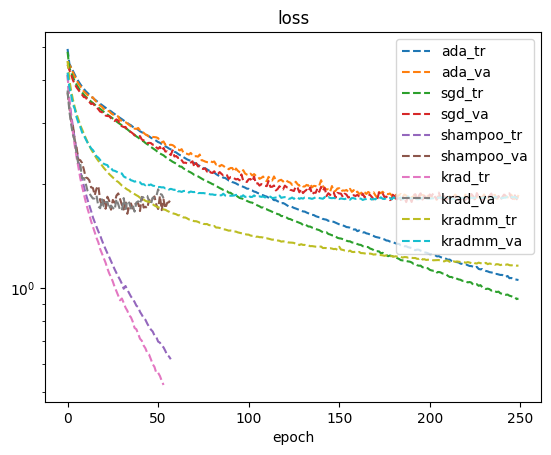

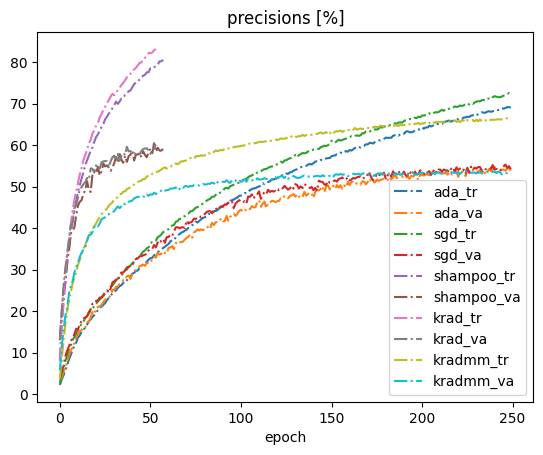

In [8]:
arch = 'resnet56'
data = 'CIFAR100'

hyperparams_to_sweep_precon = SimpleNamespace(
    optimizer=['kradmm', 'krad', 'shampoo'],  
    epochs=['250'],
    eps_str=['1e-4'],
    lr_str=['1', '2.5e-1', '1e-1', '2.5e-2', '1e-2'],
)

hyperparams_to_sweep_gd = SimpleNamespace(
    optimizer=['sgd'],
    epochs=['250'],
    eps_str=['1e-1'],
    lr_str=['1e-1', '5e-2', '2e-2', '1e-2', '5e-3', '2e-3', '1e-3'],
)


hyperparams_to_sweep_ada = SimpleNamespace(
    optimizer=['ada'],
    epochs=['250'],
    eps_str=['1e-1'],
    lr_str=['1e-1', '5e-2', '2e-2', '1e-2', '5e-3', '2e-3', '1e-3'],
)


loss_s, prec_s = fetch_loss_prec(arch, data, [
    hyperparams_to_sweep_precon, hyperparams_to_sweep_gd, hyperparams_to_sweep_ada
])

opts_to_plot = ['ada', 'sgd', 'shampoo', 'krad', 'kradmm']

plt.figure()
for opt_name_ in opts_to_plot:
    plt.semilogy(loss_s[opt_name_], '--')
    #plt.plot(loss_s[opt_name_], '--')
plt.legend(flatten([
    ('{}_tr'.format(opt_), '{}_va'.format(opt_)) for opt_ in opts_to_plot
]))
plt.xlabel('epoch')
plt.title('loss')


plt.figure()
for opt_name_ in opts_to_plot:
    plt.plot(prec_s[opt_name_], '-.')
plt.legend(flatten([
    ('{}_tr'.format(opt_), '{}_va'.format(opt_)) for opt_ in opts_to_plot
]))
plt.xlabel('epoch')
plt.title('precisions [%]')

plt.show()